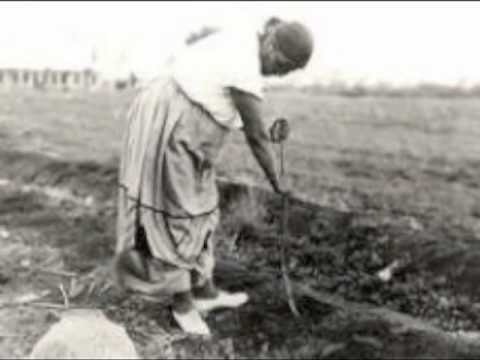

In [1]:
#https://www.kaggle.com/lucky1/pima-indians-diabetes-dataset-part-1
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

In [2]:
# show plots inside the notebook  
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes_dataset = pd.read_csv("C:\\Users\\kasi\\Desktop\\iit_data_science\\diabetis_project\\diabetes.csv")

In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [8]:
#data cleaning
# This replaces zero/invalid values with the mean in the group.
# But it does not seem to improve the results, that's why it's deactivated.
# dataset_nozeros = diabetes_dataset.copy()

# zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
# diabetes_dataset[zero_fields] = diabetes_dataset[zero_fields].replace(0, np.nan)
# diabetes_dataset[zero_fields] = diabetes_dataset[zero_fields].fillna(dataset_nozeros.mean())
# diabetes_dataset.describe()  # check that there are no invalid values left

Data Stratification
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [9]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(diabetes_dataset, test_size=0.25, random_state=0, stratify=diabetes_dataset['Outcome']) 

# separate the 'Outcome' column from training/testing data
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['Outcome']
test_Y = test['Outcome']

Statistical Model

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [11]:
# calculate accuracy
from sklearn import metrics

print(metrics.accuracy_score(test_Y, prediction))


0.7760416666666666


In [13]:
#null accuracy

#... is the accuracy that could be achieved by always predicting the most frequent class.
the_most_outcome = diabetes_dataset['Outcome'].median()
prediction2 = [the_most_outcome for i in range(len(test_Y))]
print(metrics.accuracy_score(test_Y, prediction2))

0.6510416666666666


In [14]:
#Confusion Matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_Y, prediction)
confusion_matrix

array([[110,  15],
       [ 28,  39]], dtype=int64)

<Figure size 432x288 with 0 Axes>

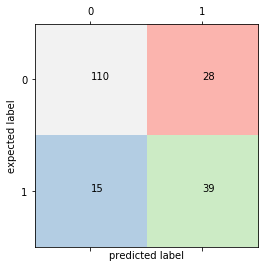

In [15]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

For beginners the visual respresentation of the confusion matrix helps a lot. Later on you probably don't need it anymore. We can see the following in the table:

0: Person will have diabetes in 5 years
1: Person will NOT have diabetes in 5 years

True Positives (TP): (39) we correctly predicted that they do have diabetes
True Negatives (TN): (110) we correctly predicted that they don't have diabetes
False Positives (FP): (28) we incorrectly predicted that they do have diabetes
False Negatives (FN): (15) we incorrectly predicted that they don't have diabetes

From these values we can calculate the following classification metrics:

Sensitivity (aka "True Positive Rate" or "Recall"): When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Specificity: When the actual value is negative, how often is the prediction correct?

Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?

In [16]:
# [row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificy  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.5821
Specificy  : 0.8800
